In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# 1.Rotation Of A Point Mass Around A Point In Space

In [2]:
# I will be using SI units

#assuming numerical values to operate on.
m=1  #mass
r=1  #radius
omega=1 #angular velocity

In [3]:
time=np.linspace(0,2*np.pi,150)
x=r*np.cos(omega*time)
y=r*np.sin(omega*time)

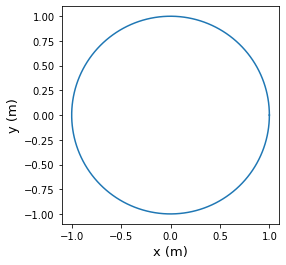

In [4]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(x,y)

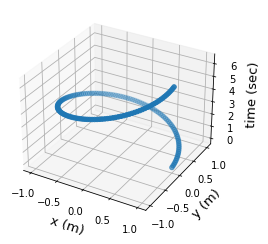

In [5]:
plt3d=plt.axes(projection='3d')
plt3d.set_xlabel('x (m)')
plt3d.set_ylabel('y (m)')
plt3d.set_zlabel('time (sec)')
plt3d.scatter3D(x,y,time)

## Calculate Energy

In [6]:
periodicTime=2*np.pi / omega
distance =2*np.pi*r #circumfrance.

Rotational Energy = K.E

In [7]:
#v=omga*r 
energy= 0.5 * m * omega**2 * r**2
energy

0.5

# 2.Rotation Energy Of Multiple Point Masses (An Object)

Assuming all point masses belong to the same object, and that the mass is uniformaly distrbuted, then they have the same angular velocity, and only the the radius differs.     
$$ E_\mathrm{rotational} = \frac{I}{2}\omega^2 $$
where: $I = m \sum_i r_i^2$ : Moment of inertia

## 2.1 Rotating A Stick Around One End

In [8]:
s=1 #lenght of stick
PointsNumber=1000 # the number of points forming the stick
stick=np.linspace(0,s, PointsNumber)

### Visualizing

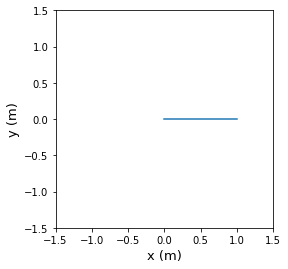

In [9]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(-1.5*s,1.5*s)
plt.ylim(-1.5*s,1.5*s)
plt.plot(stick, np.zeros(PointsNumber))

### Numirical result

In [10]:
eRotationalStickEnd=0.5 * omega**2 * (m/PointsNumber) * np.sum(stick**2)
eRotationalStickEnd

0.16675008341675007

### Analytical result


 $$ E_\mathrm{rotational} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$ I = \int\mathrm{d}m\, r^2 \quad \text{where}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad \text{and}\quad \sigma = \frac{m}{s}\quad\text{(length density)}$$
 
 $$ I = \frac{m}{s}\int_0^s\mathrm{d}r\, r^2 $$
 
 $$I = \frac{m}{s} \frac{1}{3}[r^3]_{r=0}^{r=s}$$
 
 $$ I = \frac{1}{3}ms^2$$

In [11]:
eAnalyticalStickEnd =0.5 * omega **2 * 1/3 * m * s**2
eAnalyticalStickEnd

0.16666666666666666

# 2.2 Rotating A Stick Around The Middle

In [12]:
s=1 #lenght of stick
PointsNumber=1000 # the number of points forming the stick
stick=np.linspace(-0.5*s,0.5*s, PointsNumber)

### Visualizing

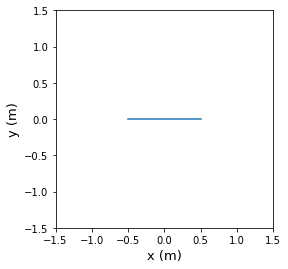

In [13]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.xlim(-1.5*s,1.5*s)
plt.ylim(-1.5*s,1.5*s)
plt.plot(stick, np.zeros(PointsNumber))

### Numerical Result

In [14]:
eRotationalStickMiddle=0.5 * omega**2 * (m/PointsNumber) * np.sum(stick**2)
eRotationalStickMiddle

0.041750083416750086

### Analytical Result

 $$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$ I = \int\mathrm{d}m\, r^2 \quad \text{where}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad \text{and}\quad \sigma = \frac{m}{s}\quad\text{(length density)}$$
 
 $$ I = \frac{m}{s}\int_{-s/2}^{s/2}\mathrm{d}r\, r^2$$
 
 $$ I = \frac{m}{s} \frac{1}{3}[r^3]_{r=-s/2}^{r=s/2}$$
 
 $$ I = \frac{m}{s} \frac{1}{3}\left[\frac{s^3}{8}-\left(-\frac{s^3}{8}\right)\right]$$
 
 $$I = \frac{1}{12}ms^2$$

In [15]:
eAnalyticalStickMiddle =0.5 * omega **2 * 1/12 * m * s**2
eAnalyticalStickMiddle

0.041666666666666664

## 2.3 Rotating A Sphere Around The Z-axis

In [16]:
#Generating Data Points
pointsNumber=30
R=1
xPoints=[]
yPoints=[]
zPoints=[]
insideSpherePoints=0
contribution=0
for x in np.linspace(-R,R,pointsNumber):
    for y in np.linspace(-R,R,pointsNumber):
        for z in np.linspace(-R,R,pointsNumber):
            if(np.linalg.norm([x,y,z])<=R):
                xPoints.append(x)
                yPoints.append(y)
                zPoints.append(z)
                insideSpherePoints=insideSpherePoints+1
                
                contribution=contribution+np.linalg.norm([x,y,0])**2
                #because we are considering the distance from z-axis, as we are rotating
                #around it, This refers to 'r' in the Integeration (check the analytical analysis below)


### Visualizing

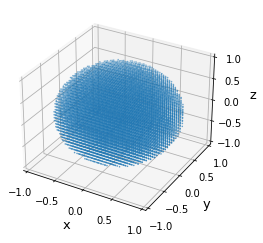

In [17]:
plt3D=plt.axes(projection='3d')
plt3D.set_xlabel("x")
plt3D.set_ylabel("y")
plt3D.set_zlabel("z")
plt3D.scatter3D(xPoints,yPoints,zPoints,s=0.3)

### Numerical Result

In [18]:
eRotationalSphereZaxis=0.5 * omega**2 * (m/insideSpherePoints) * contribution
eRotationalSphereZaxis

0.1993827959612327

### Analytical Result


 $$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$ I = \int\mathrm{d}m\, r^2 \quad \text{where}\quad \mathrm{d}m = \rho\,\mathrm{d}V \quad \text{and}\quad \rho=\frac{m}{V} \quad\text{(volume density)}$$
 
 $$ I = \frac{m}{V}\int_V\mathrm{d}V\, r^2 $$
 
 By using cylindrical coordinates
 
 $$ I = \frac{m}{V}\int_{z=-R}^{R}\int_{r=0}^{\sqrt{R^2-z^2} }\int_{\vartheta=0}^{2\pi}\,r^3\,\mathrm{d}r\mathrm{d}z\mathrm{d}\vartheta$$
  
 $$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \left[\frac{1}{4}r^4\right]_{r=0}^{\sqrt{R^2-z^2}} \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \frac{1}{4}\left(R^2-z^2\right)^2 \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,\int_{z=-R}^{R} \left(R^4-2R^2z^2+z^4\right) \,\mathrm{d}z $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,\left[R^4z-\frac{2}{3}R^2z^3+\frac{1}{5}z^5\right]_{z=-R}^{R} $$
  
  $$ I = \frac{m}{V} \frac{\pi}{2}\,2\left(R^5-\frac{2}{3}R^5+\frac{1}{5}R^5\right) $$
  
  $$ I = \frac{m}{V} \pi\,\frac{8}{15}R^5 $$
  
 By using volume of the sphere $$ V = \frac{4}{3}\pi R^3 $$
 
 $$ I = m \frac{\frac{8}{15}\pi R^5}{\frac{4}{3}\pi R^3} $$
 
 $$ I = \frac{2}{5}mR^2$$

In [19]:
analyticalSphericalZaxis= 0.5 * omega**2 * 2/5 * m * R**2
analyticalSphericalZaxis

0.2

## 2.4 Rotating A Spherical Shell Around The Z-axis

In [20]:
#we will be using the same code as the above one but with very little changes.

#Generating Data Points
pointsNumber=40 #increasing the number of points as we are working on a smaller range now. 
R=1
R2=0.8 # The shpere shell will be the thin layer betwen R1 and R2
xPoints=[]
yPoints=[]
zPoints=[]
insideSpherePoints=0
contribution=0
for x in np.linspace(-R,R,pointsNumber):
    for y in np.linspace(-R,R,pointsNumber):
        for z in np.linspace(-R,R,pointsNumber):
            if((np.linalg.norm([x,y,z])<=R) and (np.linalg.norm([x,y,z])>=R2)): #getting the points in the thin shpere shell
                xPoints.append(x)
                yPoints.append(y)
                zPoints.append(z)
                insideSpherePoints=insideSpherePoints+1
                
                contribution=contribution+np.linalg.norm([x,y,0])**2

### Visualizing

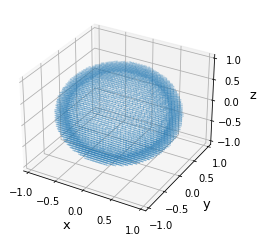

In [21]:
plt3D=plt.axes(projection='3d')
plt3D.set_xlabel("x")
plt3D.set_ylabel("y")
plt3D.set_zlabel("z")
plt3D.scatter3D(xPoints,yPoints,zPoints,s=0.05)

### Numerical Result

In [22]:
eRotationalSphereZaxis=0.5 * omega**2 * (m/insideSpherePoints) * contribution
eRotationalSphereZaxis

0.2755370034739556


 $$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2$$

 $$ I = \int\mathrm{d}m\, r^2 \quad \text{where}\quad \mathrm{d}m = \rho\,\mathrm{d}V \quad \text{and}\quad \rho=\frac{m}{V} \quad\text{(volume density)}$$
 
 $$ I = \frac{m}{\frac{4}{3}\pi(r_{1}^3-r_{2}^3)}\int_V\mathrm{d}V\, r^2 $$
 $$ I = \frac{m}{\frac{4}{3}\pi(r_{1}^3-r_{2}^3)} \int_{0}^{2\pi}\int_{0}^{\pi }\int_{r2}^{r1}\,\rho^4 \sin(\phi)^3\,\mathrm{d}\vartheta\mathrm{d}\phi\mathrm{d}\rho$$
 $$I=\frac{2}{5} m \frac{r_{1}^5 -r_{2}^5}{r_{1}^3 -r_{2}^3}$$

In [23]:
analyticalSphericalShell=0.5 * omega**2 * 2/5 * m * ((R**5 -R2**5)/(R**3-R2**3))
analyticalSphericalShell

0.27554098360655743